<a href="https://colab.research.google.com/github/Ruhihasan/mini-project/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
# Data :Images


In [ ]:
!pip install bing_image_downloader


In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download(" ice cream cone",limit=30,output_dir='images',adult_filter_off=True)

In [ ]:
# preprocessing
# resizing
#flattening
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
DATADIR='/content/images'
CATEGORIES = ['pretty sunflower','rugby ball leather']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
   # plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)      
        

time: 11.6 s (started: 2021-04-16 12:20:54 +00:00)


In [ ]:
len(flat_data[0])

67500

time: 3.64 ms (started: 2021-04-16 12:23:38 +00:00)


In [ ]:
150*150

22500

time: 4.51 ms (started: 2021-04-16 12:23:43 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 6.07 ms (started: 2021-04-16 12:23:56 +00:00)


<BarContainer object of 2 artists>

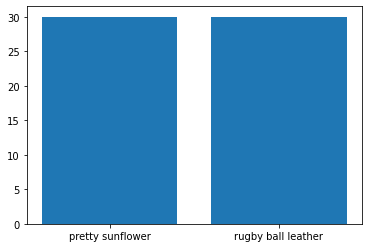

time: 118 ms (started: 2021-04-16 12:26:45 +00:00)


In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109 )

time: 17 ms (started: 2021-04-16 12:36:55 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 35.3 s (started: 2021-04-16 12:41:35 +00:00)


In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

time: 73.7 ms (started: 2021-04-16 12:44:16 +00:00)


In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 3.95 ms (started: 2021-04-16 12:44:29 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 4.85 ms (started: 2021-04-16 12:45:42 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.9444444444444444

time: 6.92 ms (started: 2021-04-16 12:46:13 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[11,  1],
       [ 0,  6]])

time: 7.91 ms (started: 2021-04-16 12:46:56 +00:00)


In [ ]:
#save the model
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 26.2 ms (started: 2021-04-16 12:49:30 +00:00)


In [ ]:
model=pickle.load(open('img_model.p','rb'))

time: 14.7 ms (started: 2021-04-16 12:51:31 +00:00)


Enter your URLhttps://dejpknyizje2n.cloudfront.net/marketplace/products/pretty-sunflower-sticker-1568137086.6732156.png
(250, 247, 4)
PREDICTED OUTPUT:pretty sunflower


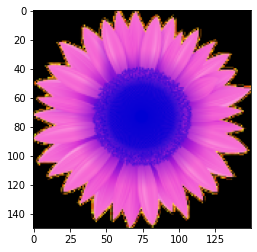

time: 40 s (started: 2021-04-16 14:21:32 +00:00)


In [ ]:
#testing
flat_data=[]
url=input('Enter your URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

In [ ]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

time: 6.39 s (started: 2021-04-16 14:32:20 +00:00)
